시험에서의 학생 성과 

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

score = pd.read_csv("/Users/hanjaemin/Desktop/aiffel/aiffel_datathon/StudentsPerformance.csv")

In [3]:
# 데이터 형태 확인
score.shape

(1000, 8)

In [4]:
# 데이터 확인
score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


사용한 데이터는 1000명의 학생에 대한 성별, 인종/민족, 부모의 학력 수준, 시험 전 점심식사 여부, 시험 준비 코스 수강 여부 등의 범주형/이진형 데이터와 그에 따른 수학, 읽기, 쓰기 성적으로 이루어져 있다.

- gender : male, female 두 가지
- race/ethnicity : group A ~ E 다섯 가지
- parental level of education : 총 여섯 가지
    - some high school : 고등학교 중퇴
    - some college : college 중퇴
    - high school : 고등학교 졸업
    - associate's degree : 전문 학사  
    - bachelor's degree : 학사 학위  
    - master's degree : 석사
- lunch : 시험 전 식사를 평상시 처럼 한 경우(standard)와, 안먹거나 조금 먹은 경우(free/reduced) 두 가지
- test prepataion course : 시험 대비반 수업 같은걸 들었는지(o/x) 두 가지


데이터의 결측치가 있는지 확인해보자

In [5]:
score[score.isna()].value_counts()

Series([], dtype: int64)

결측치가 없는 이상적인 데이터이다

세 성적들을 제외한 행들의 분포를 `pandas.Series.value_count()` method를 이용하여 확인해 보자

In [6]:
# 남녀 숫자 확인
score['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [7]:
# 각 인종 그룹에 몇명이 있는지 확인
score['race/ethnicity'].value_counts().sort_index()

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [8]:
# 부모님 학력 그룹에 몇명이 있는지 확인
score['parental level of education'].value_counts().sort_index()

associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64

In [9]:
# 점심 먹은 학생과 먹지 않은 학생 수 확인
score['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [10]:
# 시험 공부 한 학생과 안 한 학생 수 확인
score['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

각 컬럼별 수를 확인했는데 이렇게 보니 보기 불편함. 시각화를 해보자

# 1. 각 칼럼 별 분포를 적절한 방법으로 시각화하기

위 결과들을 한번에 시각화해 보겠습니다

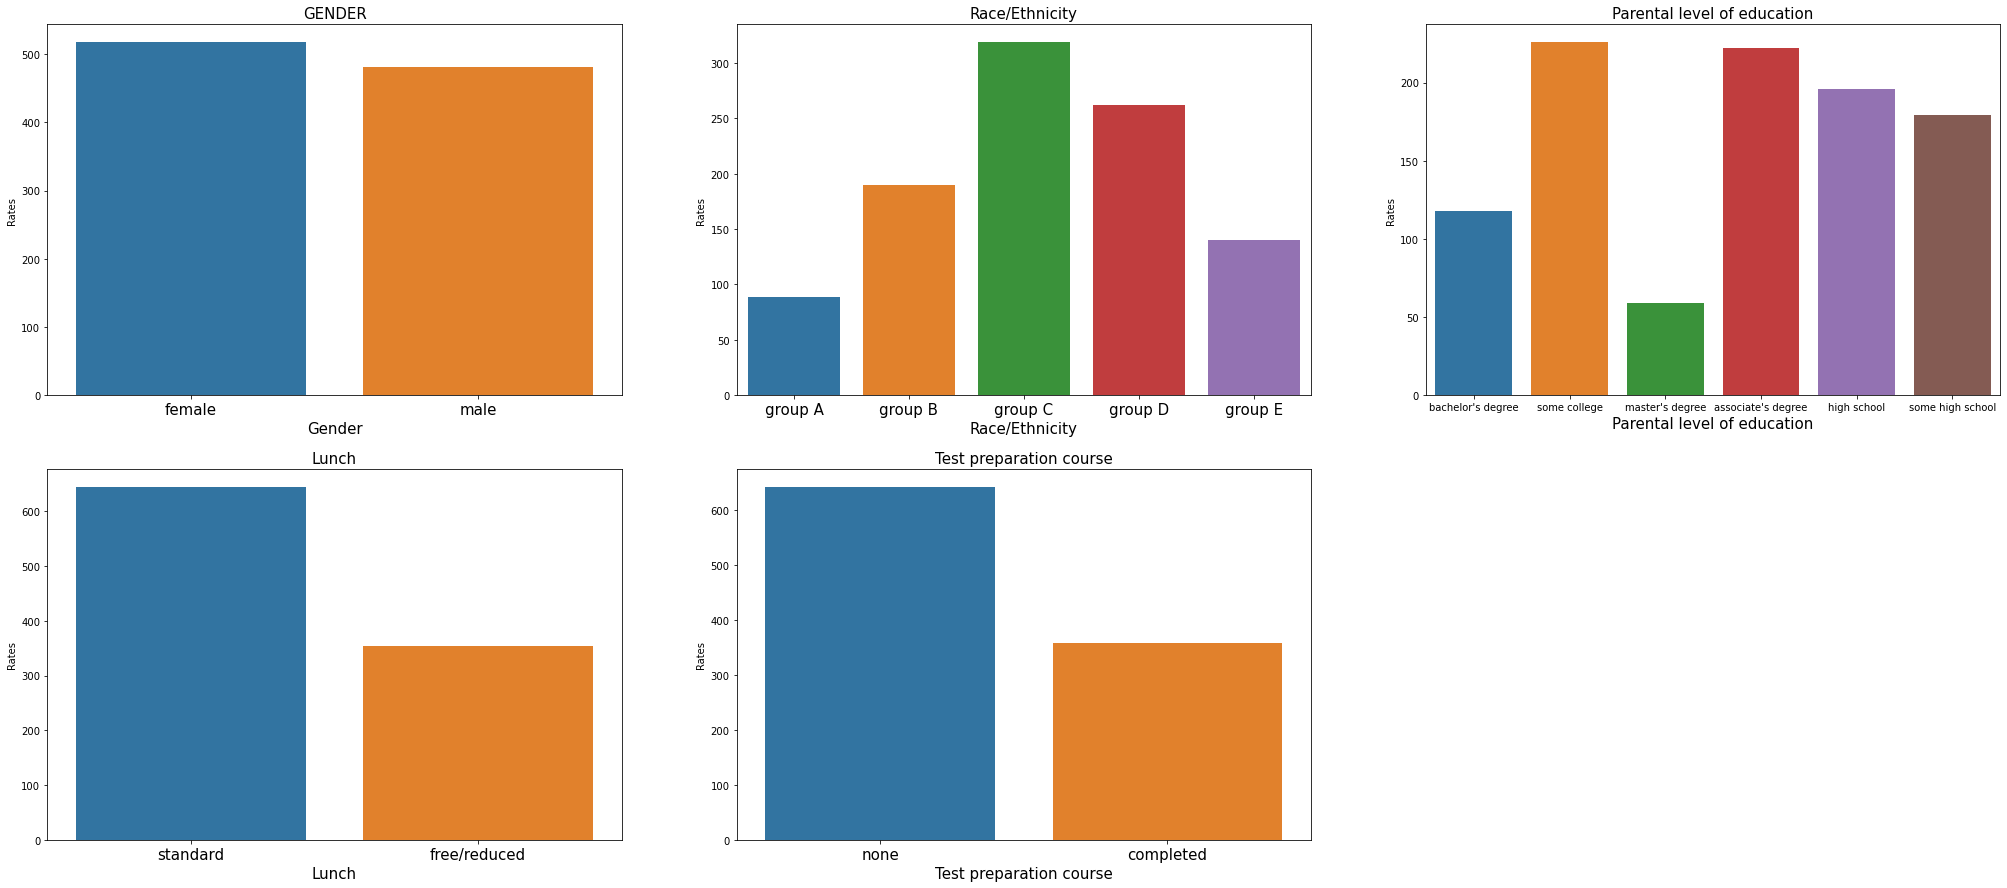

In [11]:
# 시각화 (1)
plt.figure(figsize=(35, 15))

## 성별
plt.subplot(2, 3, 1)
sns.countplot(x = 'gender', data=score)
plt.title('GENDER',fontsize =15)
plt.xlabel('Gender',fontsize = 15)
plt.ylabel('Rates')
plt.xticks(fontsize = 15)

## 인종/민족
plt.subplot(2, 3, 2)
sns.countplot(x = score['race/ethnicity'], data=score['race/ethnicity'], order=score['race/ethnicity'].value_counts().sort_index().index)
plt.title('Race/Ethnicity',fontsize =15)
plt.xlabel('Race/Ethnicity',fontsize = 15)
plt.ylabel('Rates')
plt.xticks(fontsize = 15)


## 부모님의 학력
plt.subplot(2, 3, 3)
sns.countplot(x = 'parental level of education', data=score)
plt.title('Parental level of education',fontsize =15)
plt.xlabel('Parental level of education',fontsize = 15)
plt.ylabel('Rates')

## 점심 유무
plt.subplot(2, 3, 4)
sns.countplot(x = 'lunch', data=score)
plt.title('Lunch',fontsize =15)
plt.xlabel('Lunch',fontsize = 15)
plt.ylabel('Rates')
plt.xticks(fontsize = 15)

## 시험공부 유무
plt.subplot(2, 3, 5)
sns.countplot(x = 'test preparation course', data=score)
plt.title('Test preparation course',fontsize =15)
plt.xlabel('Test preparation course',fontsize = 15)
plt.ylabel('Rates')
plt.xticks(fontsize = 15)

plt.show()

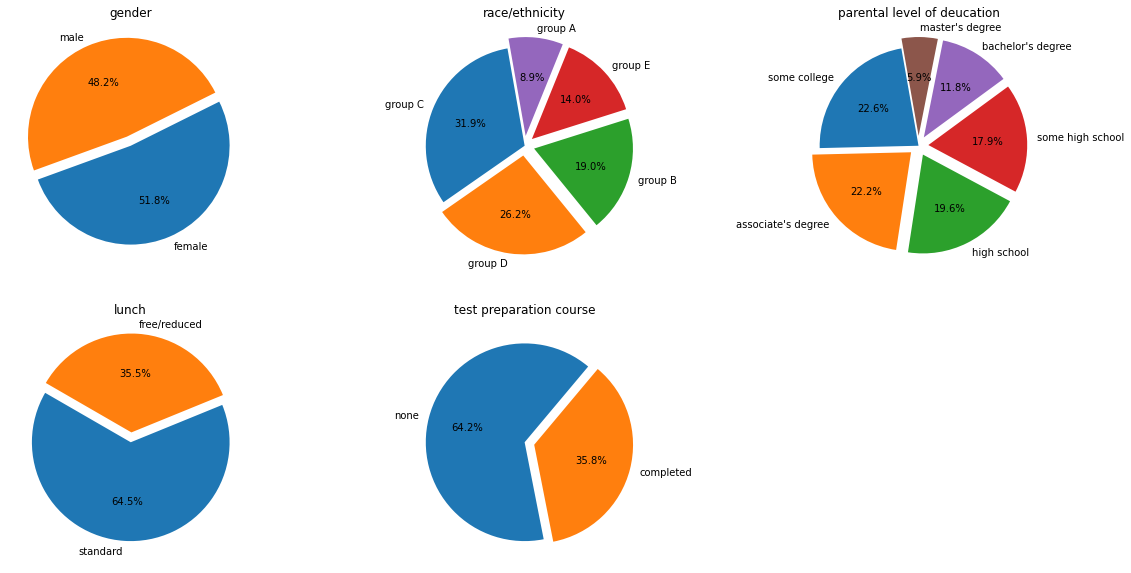

In [12]:
# 시각화 (2)
f,ax = plt.subplots(2,3, figsize=(20,10))

## 성별
score['gender'].value_counts().plot.pie(autopct='%.1f%%',startangle=200,explode=(0,0.1), ax=ax[0][0],ylabel=(''))
ax[0][0].set_title('gender')

## 인종/민족
score['race/ethnicity'].value_counts().plot.pie(autopct='%.1f%%',startangle=100,explode=(0,0.1,0.1,0.1,0.1), ax=ax[0][1],ylabel=(''))
ax[0][1].set_title('race/ethnicity')

## 부모님의 학력
score['parental level of education'].value_counts().plot.pie(autopct='%.1f%%',startangle=100,explode=(0,0.1,0.1,0.1,0.1,0.1),ax=ax[0][2],ylabel=(''))
ax[0][2].set_title('parental level of deucation')

## 점심 유무
score['lunch'].value_counts().plot.pie(autopct='%.1f%%',startangle=150, explode=(0,0.1),ax=ax[1][0],ylabel=(''))
ax[1][0].set_title('lunch')

## 시험공부 유무
score['test preparation course'].value_counts().plot.pie(autopct='%.1f%%',startangle=50,explode=(0,0.1),ax=ax[1][1],ylabel=(''))
ax[1][1].set_title('test preparation course')

## 마지막 그래프 필요없으니 삭제
ax[1][2].axis('off')

plt.show()

다음은 각 math,reading,writing의 점수 분포를 확인해보겠습니다

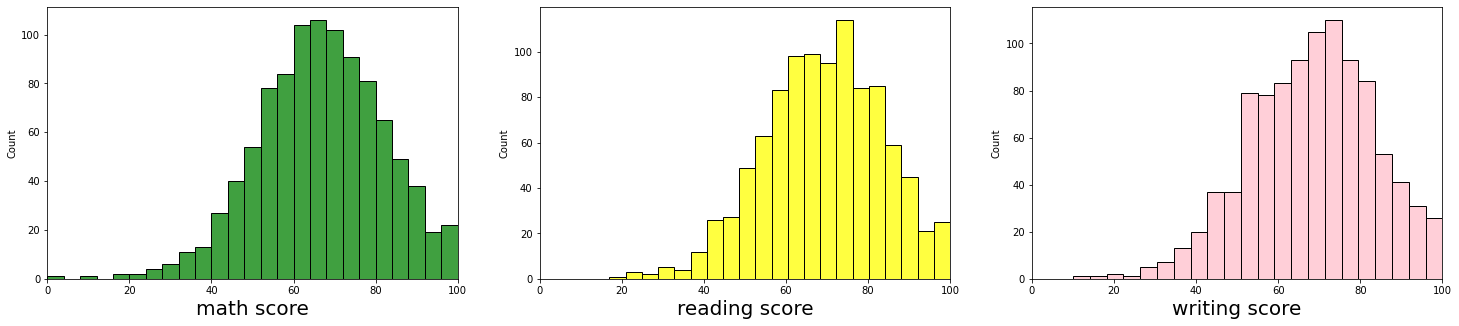

In [13]:
# 각 시험 점수 시각화 (1)
plt.figure(figsize=(25, 5))

## 수학 점수 분포
plt.subplot(1, 3, 1)
plt.xlim(0,100)
sns.histplot(x = 'math score', data=score ,color='green')
plt.xlabel('math score',fontsize=20)

## 읽기 점수 분포
plt.subplot(1, 3, 2)
plt.xlim(0,100)
sns.histplot(x = 'reading score', data=score, color='yellow')
plt.xlabel('reading score',fontsize=20)

## 쓰기 점수 분포
plt.subplot(1, 3, 3)
plt.xlim(0,100)
sns.histplot(x = 'writing score', data=score, color='pink')
plt.xlabel('writing score',fontsize=20)

plt.show()

>  범주형 데이터들을 <span style="color : blue">**boxplot**</span>을 사용해서 나타내어보자!
>
> boxplot?
>  - 박스플롯은 데이터의 분포와 이상치를 동시에 보여주면서 서로 다른 데이터군을 쉽게 비교할 수 있는 >데이터 시각화 유형임
>  - 로우 데이터를 바로 사용하지 않고 다섯 숫자 요약(five number summary)라는 통계학적 개념으로 데이터를 가공하여 시각화합니다
>  - 최솟값, 최댓값, Q1, Q2(중앙값), Q3로 구성됩니다.  
>  - 수염은 Q3 + IQR(Q3 - Q1) 의 1.5배 내부의 최댓값.   
>  - Q1 - IQR(Q3 - Q1) 의 1.5배 내부의 최솟값

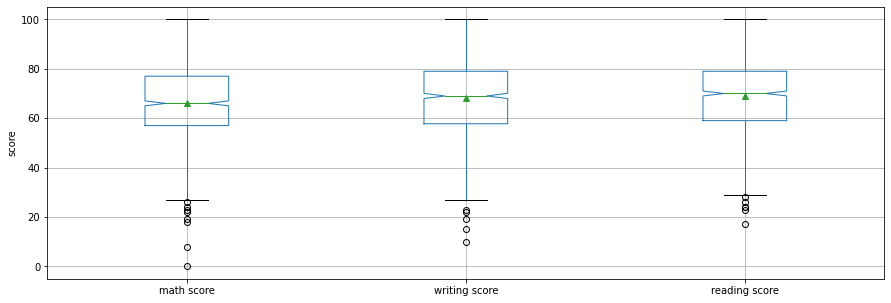

In [14]:
# 각 시험 점수 시각화 (2)
plt.figure(figsize=(15,5))

score.boxplot(column=['math score', 'writing score', 'reading score'], notch=True, showmeans=True)
plt.ylabel('score')

plt.show()

# 2. 다섯 가지 특성별로 성적 분포가 어떻게 달라지는지 시각화해 보자

## 이진형 데이터인 gender, lunch, test preparaion course에 대해서 시각화

### 2-1. 성별 별 시험 성적 분포

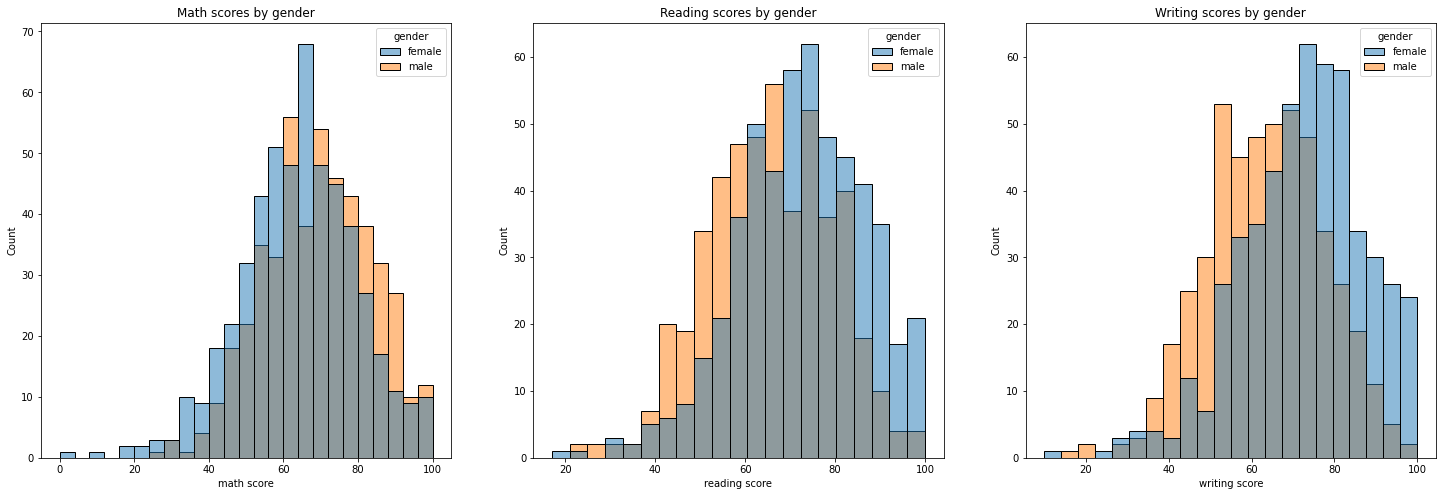

In [15]:
# 성별에 따른 성적 시각화

fig = plt.figure(figsize=(25,8))

# 수학 성적
ax1 = fig.add_subplot(1,3,1)
sns.histplot(x = 'math score', hue = 'gender', data = score)
plt.title('Math scores by gender')

# 읽기 성적
ax2 = fig.add_subplot(1,3,2)
sns.histplot(x = 'reading score', hue = 'gender', data = score)
plt.title('Reading scores by gender')


# 쓰기 성적
ax3 = fig.add_subplot(1,3,3)
sns.histplot(x = 'writing score', hue = 'gender', data = score)
plt.title('Writing scores by gender')

plt.show()

In [16]:
# 성별에 따른 성적 평균, 표준편차 구하기

## 남자 수학 평균
score_male = score[score['gender'] == 'male']
math_mean_male = numpy.mean(score_male['math score'])
print('남자 수학 평균    :', round(math_mean_male, 2))

## 남자 수학 표준편차
math_std_male = numpy.std(score_male['math score'])
print('남자 수학 표준편차 :', round(math_std_male, 2))

## 여자 수학 평균
score_female = score[score['gender'] == 'female']
math_mean_female = numpy.mean(score_female['math score'])
print('여자 수학 평균    :', round(math_mean_female, 2))

## 여자 수학 표준편차
math_std_female = numpy.std(score_female['math score'])
print('여자 수학 표준편차 :', round(math_std_female, 2))

## 남자 읽기 평균
reading_mean_male = numpy.mean(score_male['reading score'])
print('남자 읽기 평균    :', round(reading_mean_male, 2))

## 남자 읽기 표준편차
reading_std_male = numpy.std(score_male['reading score'])
print('남자 읽기 표준편차 :', round(reading_std_male, 2))

## 여자 읽기 평균
reading_mean_female = numpy.mean(score_female['reading score'])
print('여자 읽기 평균    :', round(math_mean_female, 2))

## 여자 읽기 표준편차
reading_std_female = numpy.std(score_female['reading score'])
print('여자 읽기 표준편차 :', round(reading_std_female, 2))

## 남자 쓰기 평균
writing_mean_male = numpy.mean(score_male['writing score'])
print('남자 쓰기 평균    :', round(writing_mean_male, 2))

## 남자 쓰기 표준편차
writing_std_male = numpy.std(score_male['writing score'])
print('남자 쓰기 표준편차 :', round(writing_std_male, 2))

## 여자 쓰기 평균
writing_mean_female = numpy.mean(score_female['writing score'])
print('여자 쓰기 평균    :', round(writing_mean_female, 2))

## 여자 쓰기 표준편차
writing_std_female = numpy.std(score_female['writing score'])
print('여자 쓰기 표준편차 :', round(writing_std_female, 2))

남자 수학 평균    : 68.73
남자 수학 표준편차 : 14.34
여자 수학 평균    : 63.63
여자 수학 표준편차 : 15.48
남자 읽기 평균    : 65.47
남자 읽기 표준편차 : 13.92
여자 읽기 평균    : 63.63
여자 읽기 표준편차 : 14.36
남자 쓰기 평균    : 63.31
남자 쓰기 표준편차 : 14.1
여자 쓰기 평균    : 72.47
여자 쓰기 표준편차 : 14.83


In [17]:
# 성별에 따른 성적 평균, 표준편차를 DataFrame으로 만들기
score_gender_mean_std = pd.DataFrame({'gender':['male','female'], 
                               'math_mean':[68.72821576763485,63.633204633204635],
                               'math_std':[14.341377060332784,15.4764928784033],
                               'reading_mean':[65.47302904564316,63.633204633204635],
                               'reading_std':[13.91737245208702,14.36435998342726],
                               'writing_mean':[63.31120331950208,72.46718146718146],
                               'writing_std':[14.099183306891105,14.830505845684575]})
score_gender_mean_std

,gender,math_mean,math_std,reading_mean,reading_std,writing_mean,writing_std
0,male,68.728216,14.341377,65.473029,13.917372,63.311203,14.099183
1,female,63.633205,15.476493,63.633205,14.364360,72.467181,14.830506


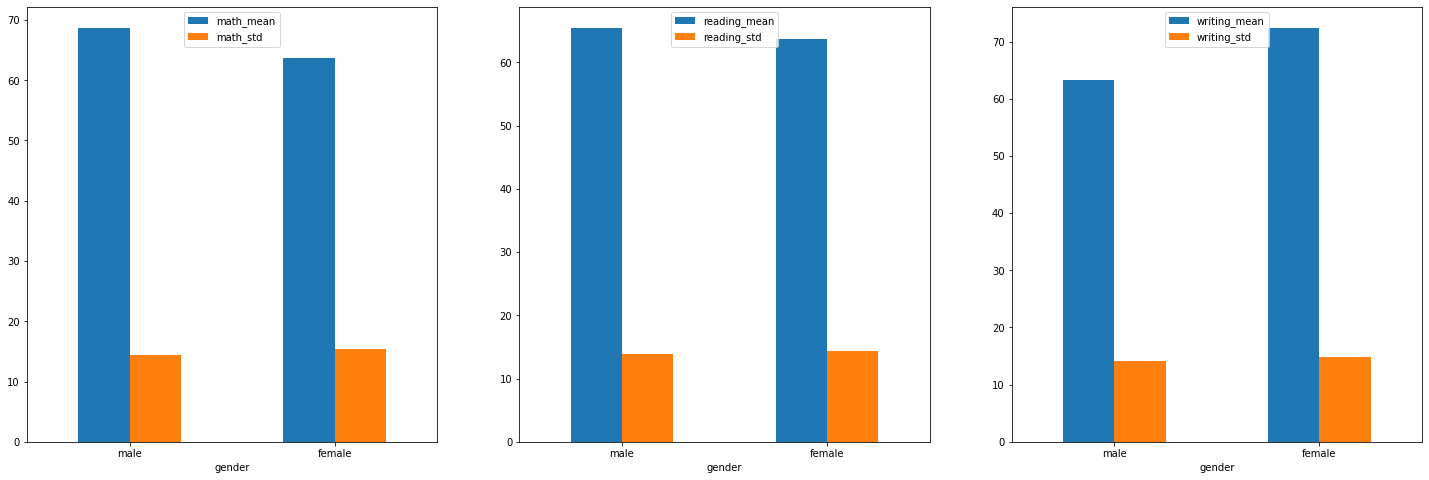

In [18]:
# 성별에 따른 성적 평균, 표준편차 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

## 수학 평균, 표준편차 
score_gender_mean_std.plot(x = 'gender',y = ['math_mean','math_std'], rot=0, kind='bar', ax=axes[0])
axes[0].legend(loc="upper center")

## 읽기 평균, 표준편차
score_gender_mean_std.plot(x = 'gender',y = ['reading_mean','reading_std'], rot=0, kind='bar', ax=axes[1])
axes[1].legend(loc="upper center")

## 쓰기 평균, 표준편차
score_gender_mean_std.plot(x = 'gender',y = ['writing_mean','writing_std'], rot=0, kind='bar', ax=axes[2])
axes[2].legend(loc="upper center")

plt.show()

박스그래프로 나타내면 분포를 조금 더 직관적으로 확인할 수 있다.

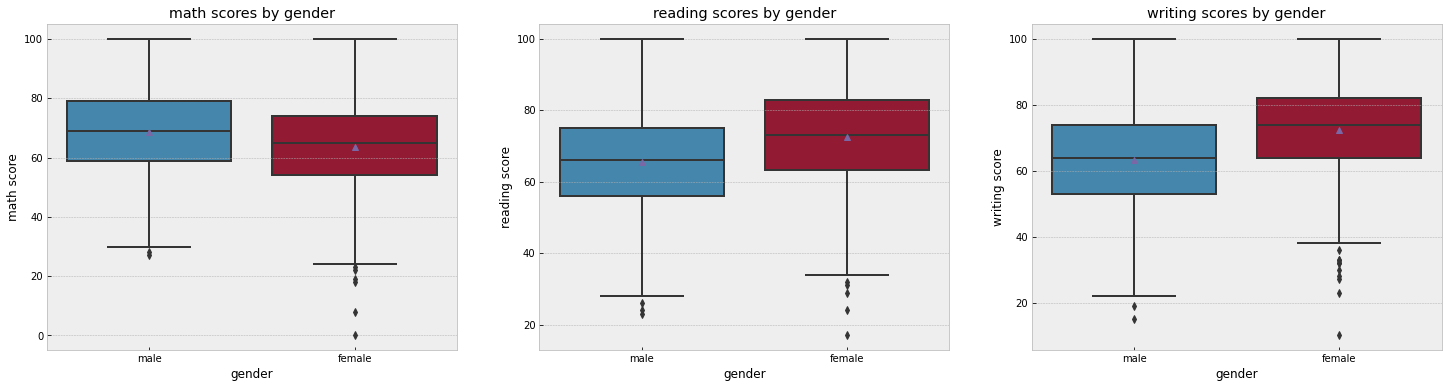

In [19]:
# 성별에 따른 성적 평균, 표준편차 시각화 (2)
plt.style.use('bmh')

## 수학 
plt.figure(figsize = (25, 6))
plt.subplot(131)
sns.boxplot(x="gender", y="math score", data=score, showmeans=True, order=['male', 'female'])
plt.title('math scores by gender')

## 읽기
plt.subplot(132)
sns.boxplot(x="gender", y="reading score", data=score, showmeans=True, order=['male', 'female'])
plt.title('reading scores by gender')

## 쓰기
plt.subplot(133)
sns.boxplot(x="gender", y="writing score", data=score, showmeans=True, order=['male', 'female'])
plt.title('writing scores by gender')

plt.show()

 - 수학은 남자가 더 잘하지만 읽기, 쓰기는 여자가 더 잘하는 걸 알 수 있다.

### 2-2. 시험 치기 전 점심 식사 여부에 따른 성적 분포

Text(0.5, 1.0, 'Writing scores by lunch')

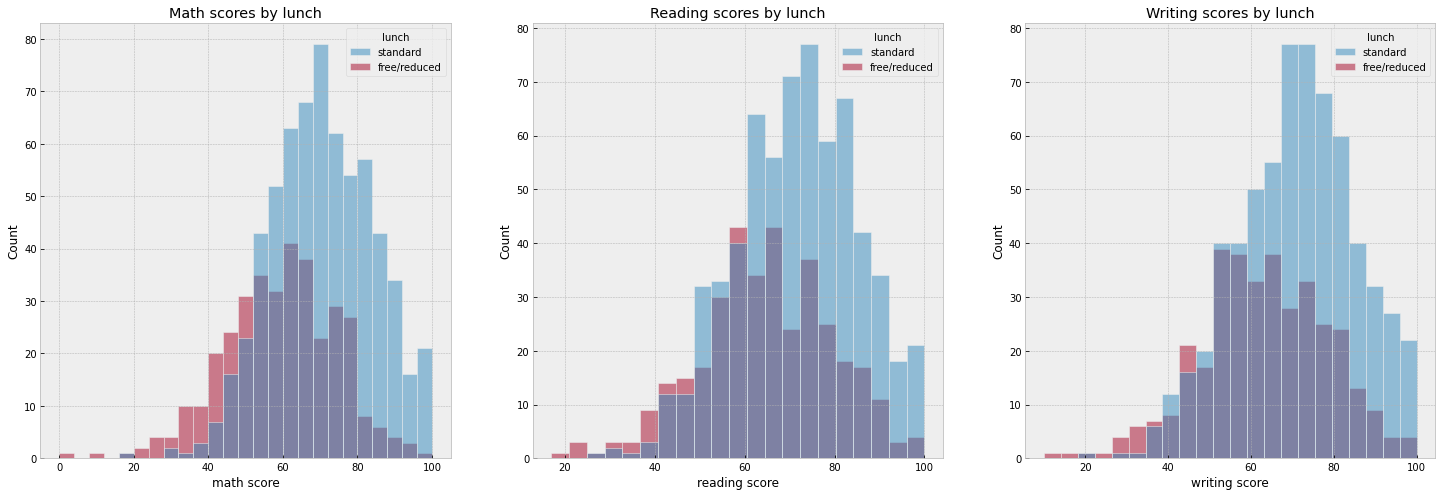

In [20]:
# 시험전 점심 유무에 따른 성적 시각화

fig = plt.figure(figsize=(25,8))

## 수학
ax1 = fig.add_subplot(1,3,1)
sns.histplot(x = 'math score', hue = 'lunch', data = score)
plt.title('Math scores by lunch')

## 쓰기
ax2 = fig.add_subplot(1,3,2)
sns.histplot(x = 'reading score', hue = 'lunch', data = score)
plt.title('Reading scores by lunch')

## 읽기
ax3 = fig.add_subplot(1,3,3)
sns.histplot(x = 'writing score', hue = 'lunch', data = score)
plt.title('Writing scores by lunch')

In [21]:
# 시험전 점심 유무에 따른 성적 평균, 표준편차 구하기

## 점심 o 수학 평균
score_lunch = score[score['lunch'] == 'standard']
math_mean_lunch = numpy.mean(score_lunch['math score'])
print('점심 o 수학 평균 :', math_mean_lunch)

## 점심 o 수학 표준편차
math_std_lunch = numpy.std(score_lunch['math score'])
print('점심 o 수학 표준편차 :', math_std_lunch)

## 점심 x 수학 평균
score_Nlunch = score[score['lunch'] == 'free/reduced']
math_mean_Nlunch = numpy.mean(score_Nlunch['math score'])
print('점심 x 수학 평균 :', math_mean_Nlunch)

## 점심 x 수학 표준편차
math_std_Nlunch = numpy.std(score_Nlunch['math score'])
print('점심 x 수학 표준편차 :', math_std_Nlunch)

## 점심 o 읽기 평균
reading_mean_lunch = numpy.mean(score_lunch['reading score'])
print('점심 o 읽기 평균 :', reading_mean_lunch)

## 점심 o 읽기 표준편차
reading_std_lunch = numpy.std(score_lunch['reading score'])
print('점심 o 읽기 표준편차 :', reading_std_lunch)

## 점심 x 읽기 평균
reading_mean_Nlunch = numpy.mean(score_Nlunch['reading score'])
print('점심 x 읽기 평균 :', reading_mean_Nlunch)

## 점심 x 읽기 표준편차
reading_std_Nlunch = numpy.std(score_Nlunch['reading score'])
print('점심 x 읽기 표준편차 :', reading_std_Nlunch)

## 점심 o 쓰기 평균
writing_mean_lunch = numpy.mean(score_lunch['writing score'])
print('점심 o 쓰기 평균 :', writing_mean_lunch)

## 점심 o 쓰기 표준편차
writing_std_lunch = numpy.std(score_lunch['writing score'])
print('점심 o 쓰기 표준편차 :', writing_std_lunch)

## 점심 x 쓰기 평균
writing_mean_Nlunch = numpy.mean(score_Nlunch['writing score'])
print('점심 x 쓰기 평균 :', writing_mean_Nlunch)

## 점심 x 쓰기 표준편차
writing_std_Nlunch = numpy.std(score_Nlunch['writing score'])
print('점심 x 쓰기 표준편차 :', writing_std_Nlunch)

점심 o 수학 평균 : 70.03410852713178
점심 o 수학 표준편차 : 13.642912781606295
점심 x 수학 평균 : 58.92112676056338
점심 x 수학 표준편차 : 15.138589022879579
점심 o 읽기 평균 : 71.65426356589147
점심 o 읽기 표준편차 : 13.819876752341633
점심 x 읽기 평균 : 64.65352112676057
점심 x 읽기 표준편차 : 14.874345349409413
점심 o 쓰기 평균 : 70.8232558139535
점심 o 쓰기 표준편차 : 14.328366788508454
점심 x 쓰기 평균 : 63.02253521126761
점심 x 쓰기 표준편차 : 15.412069508357737


In [22]:
# 점심 유무에 따른 성적 평균, 표준편차를 DataFrame으로 만들기
score_lunch_mean_std = pd.DataFrame({'lunch':['standard','free/reduced'], 
                               'math_mean':[70.03410852713178,58.92112676056338],
                               'math_std':[13.642912781606297,15.138589022879577],
                               'reading_mean':[71.65426356589147,64.65352112676057],
                               'reading_std':[13.819876752341637,14.874345349409408],
                               'writing_mean':[70.8232558139535,63.02253521126761],
                               'writing_std':[14.328366788508458,15.412069508357737]})
score_lunch_mean_std

,lunch,math_mean,math_std,reading_mean,reading_std,writing_mean,writing_std
0,standard,70.034109,13.642913,71.654264,13.819877,70.823256,14.328367
1,free/reduced,58.921127,15.138589,64.653521,14.874345,63.022535,15.412070


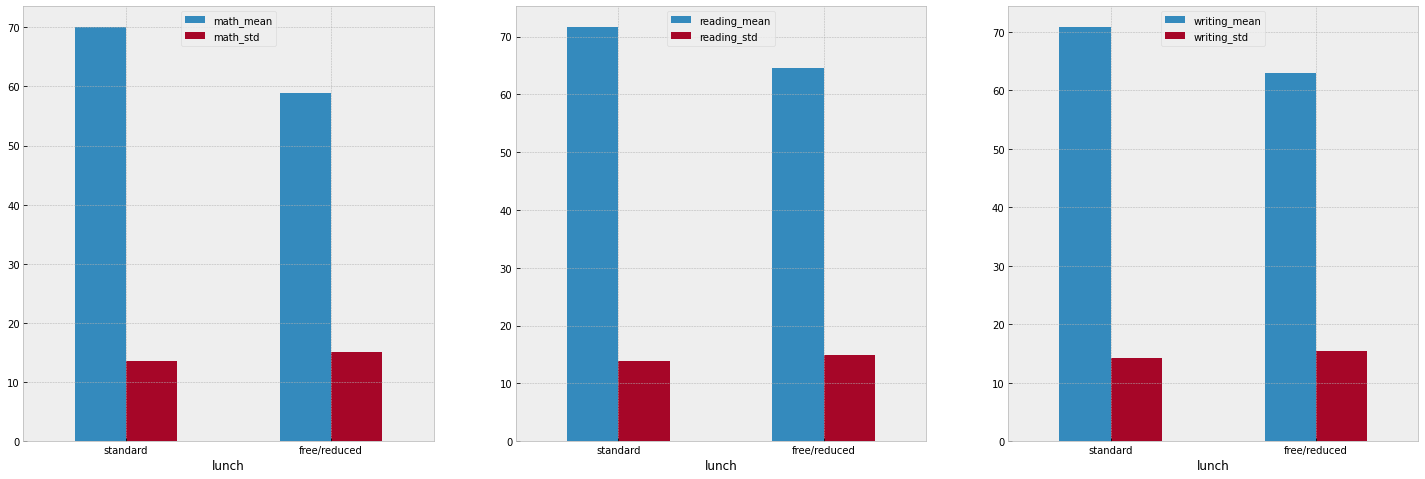

In [23]:
# 점심 유무에 따른 성적 평균, 표준편차 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

## 수학 평균, 표준편차
score_lunch_mean_std.plot(x = 'lunch',y = ['math_mean','math_std'], rot=0, kind='bar', ax=axes[0])
axes[0].legend(loc="upper center")

## 읽기 평균, 표준편차
score_lunch_mean_std.plot(x = 'lunch',y = ['reading_mean','reading_std'], rot=0, kind='bar', ax=axes[1])
axes[1].legend(loc="upper center")

## 쓰기 평균 표준편차
score_lunch_mean_std.plot(x = 'lunch',y = ['writing_mean','writing_std'], rot=0, kind='bar', ax=axes[2])
axes[2].legend(loc="upper center")

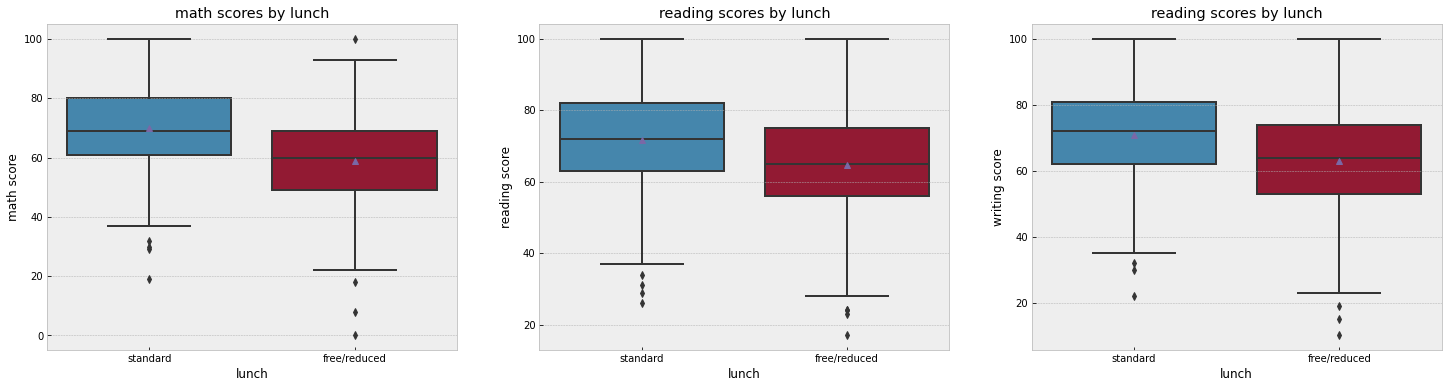

In [24]:
# 점심 유무에 따른 성적 평균, 표준편차 시각화 (2)
plt.figure(figsize = (25, 6))

## 수학
plt.subplot(131)
sns.boxplot(x="lunch", y="math score", data=score, showmeans=True)
plt.title('math scores by lunch')

## 읽기
plt.subplot(132)
sns.boxplot(x="lunch", y="reading score", data=score, showmeans=True)
plt.title('reading scores by lunch')

## 쓰기
plt.subplot(133)
sns.boxplot(x="lunch", y="writing score", data=score, showmeans=True)
plt.title('reading scores by lunch')

plt.show()

 - 점심을 먹은 학생이 점심을 먹지 않은 학생보다 잘 친 것을 볼 수 있다.
 - 뭘 먹어야 머리가 돌아간다는 말은 사실인 것 같다.

### 2-3. 시험 대비 수업 수강 여부에 따른 성적 *분포*

Text(0.5, 1.0, 'Writing scores by test preparation course')

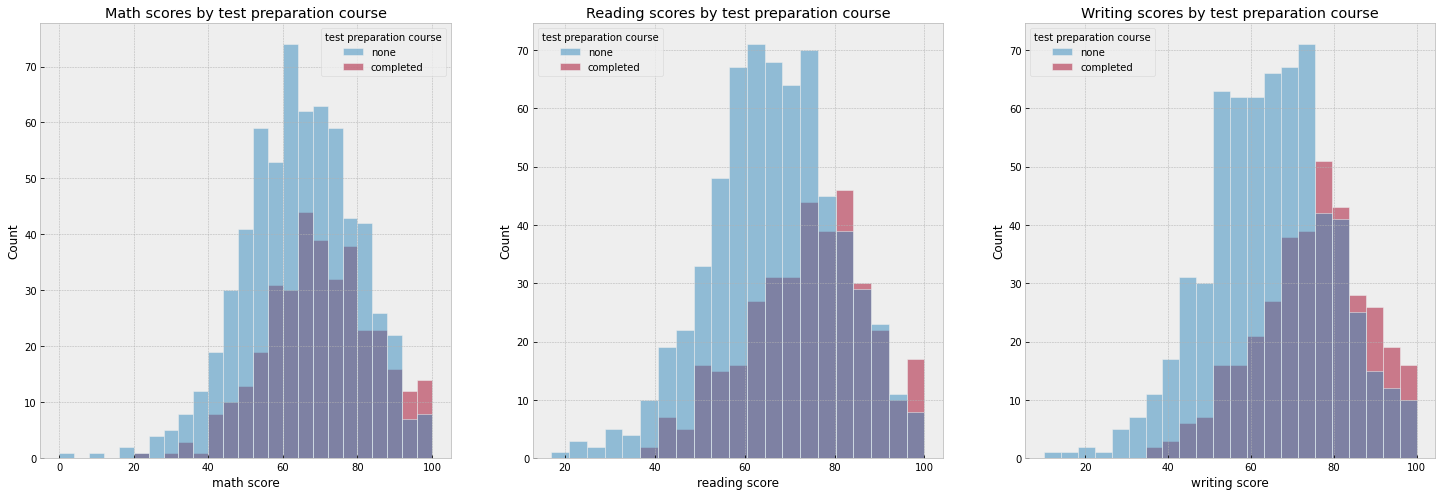

In [25]:
# 시험공부에 따른 성적 시각화
fig = plt.figure(figsize=(25,8))

## 수학
ax1 = fig.add_subplot(1,3,1)
sns.histplot(x = 'math score', hue = 'test preparation course', data = score)
plt.title('Math scores by test preparation course')

## 읽기
ax2 = fig.add_subplot(1,3,2)
sns.histplot(x = 'reading score', hue = 'test preparation course', data = score)
plt.title('Reading scores by test preparation course')

## 쓰기
ax3 = fig.add_subplot(1,3,3)
sns.histplot(x = 'writing score', hue = 'test preparation course', data = score)
plt.title('Writing scores by test preparation course')

In [26]:
# 시험공부에 따른 성적 평균, 표준편차 구하기

## 시험공부 o 수학 평균
score_pre = score[score['test preparation course'] == 'completed']
math_mean_pre = numpy.mean(score_pre['math score'])
print('시험공부 o 수학 평균 :', math_mean_pre)

## 시험공부 o 수학 표준편차
math_std_pre = numpy.std(score_pre['math score'])
print('시험공부 o 수학 표준편차 :', math_std_pre)

## 시험공부 x 수학 평균
score_Npre = score[score['test preparation course'] == 'none']
math_mean_Npre = numpy.mean(score_Npre['math score'])
print('시험공부 x 수학 평균 :', math_mean_Npre)

## 시험공부 x 수학 표준편차
math_std_Npre = numpy.std(score_Npre['math score'])
print('시험공부 x 수학 표준편차 :', math_std_Npre)

## 시험공부 o 읽기 평균
reading_mean_pre = numpy.mean(score_pre['reading score'])
print('시험공부 o 읽기 평균 :', reading_mean_pre)

## 시험공부 o 읽기 표준편차
reading_std_pre = numpy.std(score_pre['reading score'])
print('시험공부 o 읽기 표준편차 :', reading_std_pre)

## 시험공부 x 읽기 평균
reading_mean_Npre = numpy.mean(score_Npre['reading score'])
print('시험공부 x 읽기 평균 :', reading_mean_Npre)

## 시험공부 x 읽기 표준편차
reading_std_Npre = numpy.std(score_Npre['reading score'])
print('시험공부 x 읽기 표준편차 :', reading_std_Npre)

## 시험공부 o 쓰기 평균
writing_mean_pre = numpy.mean(score_pre['writing score'])
print('시험공부 o 쓰기 평균 :', writing_mean_pre)

## 시험공부 o 쓰기 표준편차
writing_std_pre = numpy.std(score_pre['writing score'])
print('시험공부 o 쓰기 표준편차 :', writing_std_pre)

## 시험공부 x 쓰기 평균
writing_mean_Npre = numpy.mean(score_Npre['writing score'])
print('시험공부 x 쓰기 평균 :', writing_mean_Npre)

## 시험공부 x 쓰기 표준편차
writing_std_Npre = numpy.std(score_Npre['writing score'])
print('시험공부 x 쓰기 표준편차 :', writing_std_Npre)

시험공부 o 수학 평균 : 69.69553072625699
시험공부 o 수학 표준편차 : 14.424510956647422
시험공부 x 수학 평균 : 64.0778816199377
시험공부 x 수학 표준편차 : 15.180538959922071
시험공부 o 읽기 평균 : 73.89385474860335
시험공부 o 읽기 표준편차 : 13.619322299201107
시험공부 x 읽기 평균 : 66.53426791277259
시험공부 x 읽기 표준편차 : 14.45261599847068
시험공부 o 쓰기 평균 : 74.41899441340782
시험공부 o 쓰기 표준편차 : 13.3566411449865
시험공부 x 쓰기 평균 : 64.50467289719626
시험공부 x 쓰기 표준편차 : 14.987974721880203


In [27]:
# 시험공부에 따른 성적 평균, 표준편차를 DataFrame으로 만들기
score_pre_mean_std = pd.DataFrame({'test preparation course':['completed','none'], 
                               'math_mean':[69.69553072625699,64.0778816199377],
                               'math_std':[14.424510956647417,15.180538959922075],
                               'reading_mean':[73.89385474860335,66.53426791277259],
                               'reading_std':[13.619322299201107,14.452615998470685],
                               'writing_mean':[74.41899441340782,64.50467289719626],
                               'writing_std':[13.356641144986506,14.987974721880214]})
score_pre_mean_std

,test preparation course,math_mean,math_std,reading_mean,reading_std,writing_mean,writing_std
0,completed,69.695531,14.424511,73.893855,13.619322,74.418994,13.356641
1,none,64.077882,15.180539,66.534268,14.452616,64.504673,14.987975


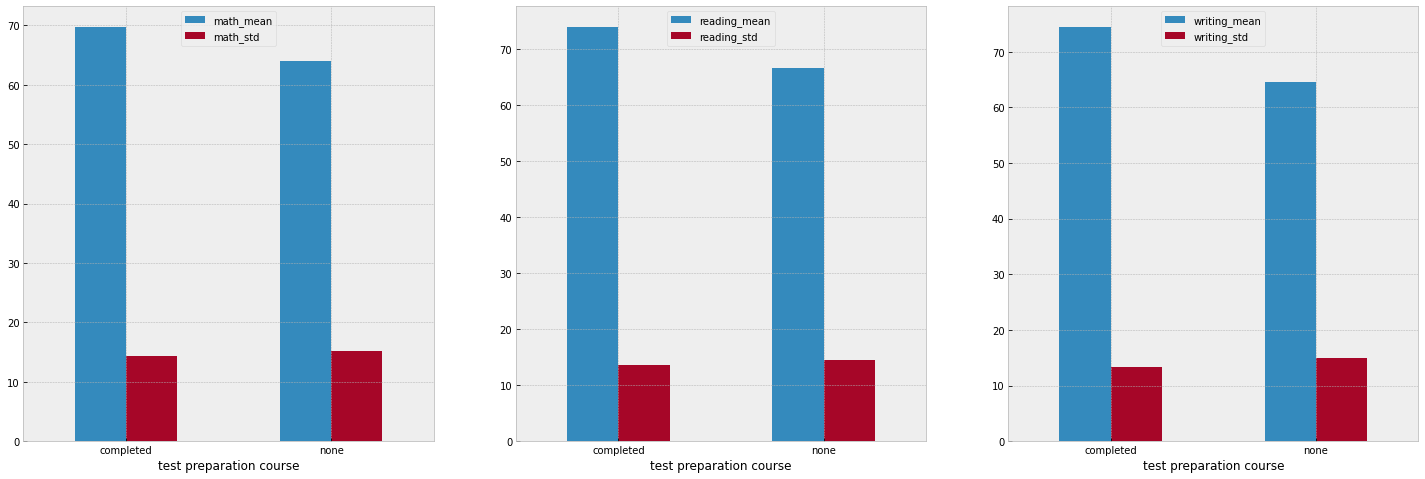

In [28]:
# 시험공부에 따른 성적 평균, 표준편차 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

## 수학 평균, 표준편차
score_pre_mean_std.plot(x = 'test preparation course',y = ['math_mean','math_std'], rot=0, kind='bar', ax=axes[0])
axes[0].legend(loc="upper center")

## 읽기 평균, 표준편차
score_pre_mean_std.plot(x = 'test preparation course',y = ['reading_mean','reading_std'], rot=0, kind='bar', ax=axes[1])
axes[1].legend(loc="upper center")

## 쓰기 평균, 표준편차
score_pre_mean_std.plot(x = 'test preparation course',y = ['writing_mean','writing_std'], rot=0, kind='bar', ax=axes[2])
axes[2].legend(loc="upper center")

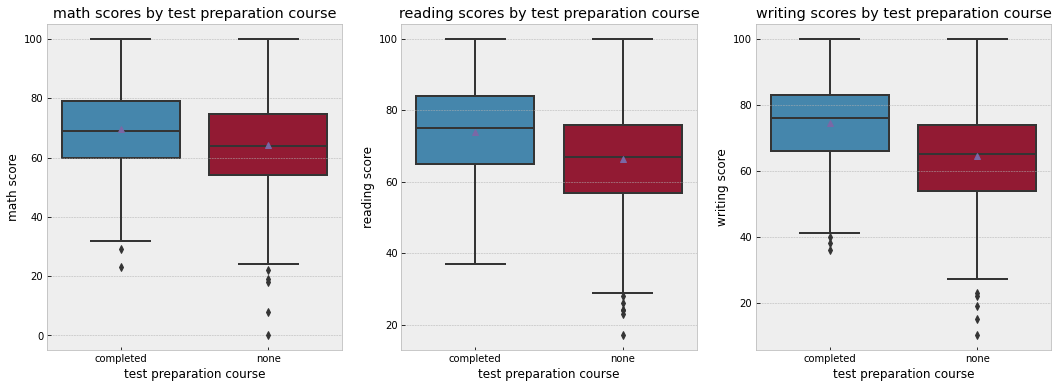

In [29]:
# 시험공부에 따른 성적 평균, 표준편차 시각화 (2)
plt.figure(figsize = (18, 6))

## 수학
plt.subplot(131)
sns.boxplot(x="test preparation course", y="math score", data=score, showmeans=True, order=['completed', 'none'])
plt.title('math scores by test preparation course')

## 읽기
plt.subplot(132)
sns.boxplot(x="test preparation course", y="reading score", data=score, showmeans=True, order=['completed', 'none'])
plt.title('reading scores by test preparation course')

## 쓰기
plt.subplot(133)
sns.boxplot(x="test preparation course", y="writing score", data=score, showmeans=True, order=['completed', 'none'])
plt.title('writing scores by test preparation course')

plt.show()

 - 당연하게도 시험공부를 한 학생이 안 한 학생보다 시험을 잘쳤지만 생각보다 공부를 안 한 학생이 시험을 못 치진 않음.

## 범주형 데이터인 race/ethincity, parental level of education에 대해서

### 2-4. 인종, 민족에 따른 성적 분포

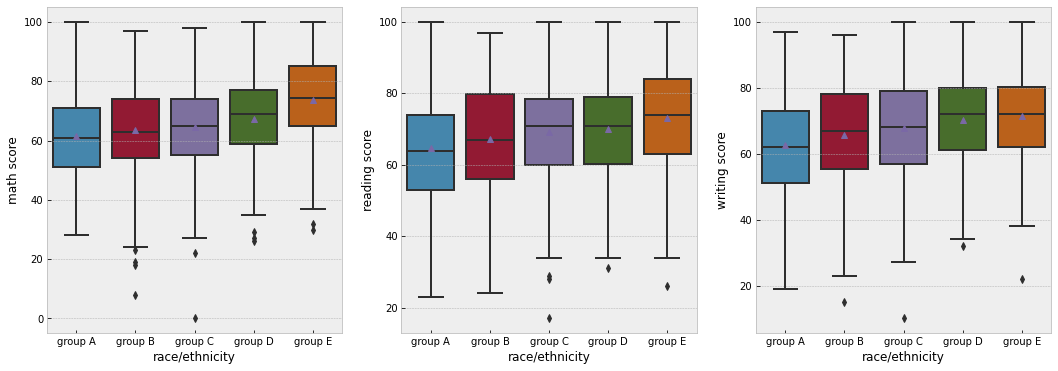

In [30]:
# 인종/민족에 따른 성적 시각화
plt.figure(figsize = (18, 6))

## 수학
plt.subplot(131)
sns.boxplot(x="race/ethnicity", y="math score", data=score, order=score['race/ethnicity'].value_counts().sort_index().index,
            showmeans=True)

## 읽기
plt.subplot(132)
sns.boxplot(x="race/ethnicity", y="reading score", data=score,
            order=score['race/ethnicity'].value_counts().sort_index().index, showmeans=True)

## 쓰기
plt.subplot(133)
sns.boxplot(x="race/ethnicity", y="writing score", data=score, order=score['race/ethnicity'].value_counts().sort_index().index, 
            showmeans=True)

plt.show()

- group E의 학생들이 공부를 제일 잘하고, group A의 학생들이 공부를 제일 못함.
- 공부를 잘하는 인종이 따로 있는진 몰랐는데 있는듯..?

### 2-5. 부모의 학력에 따른 성적 분포

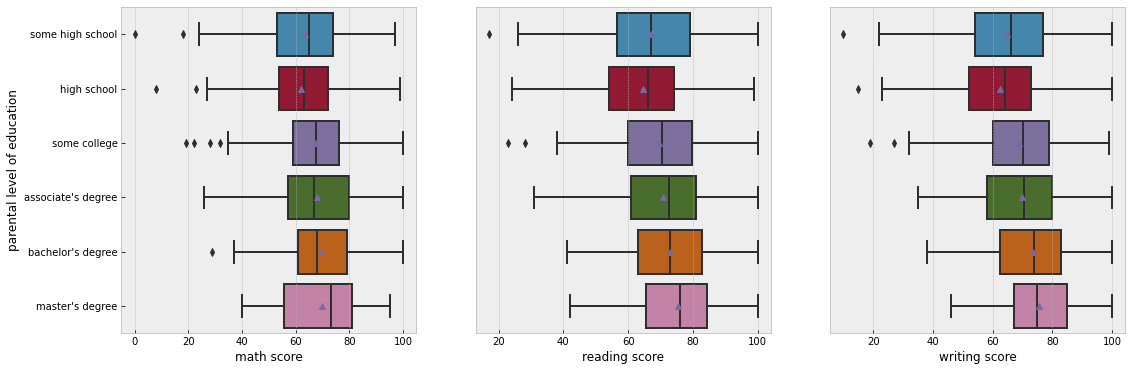

In [31]:
# 부모의 학력에 따른 성적 시각화
plt.figure(figsize = (18, 6))
plt.subplot(131)
sns.boxplot(y="parental level of education", x="math score", data=score, order=['some high school', 'high school', 'some college', 'associate\'s degree', "bachelor's degree", "master's degree"],
            showmeans=True)

plt.subplot(132)
sns.boxplot(y="parental level of education", x="reading score", data=score, order=['some high school', 'high school', 'some college', 'associate\'s degree', "bachelor's degree", "master's degree"],
            showmeans=True)
plt.yticks([])
plt.ylabel('')

plt.subplot(133)
sns.boxplot(y="parental level of education", x="writing score", data=score, order=['some high school', 'high school', 'some college', 'associate\'s degree', "bachelor's degree", "master's degree"],
            showmeans=True)
plt.ylabel('')
plt.yticks([])

plt.show()

- 부모님의 학력이 높아질수록 학생들의 점수도 높아짐.
- 학력이 그 사람의 지적능력을 가르킨다고 할수는 없지만 어느 정도는 연관이 있는듯하다.

# 세 점수 각각의 산점도를 그려보고, 상관계수를 구해보자

- 상관계수란?  
1과 -1 사이의 값으로, 절대값의 크기는 직선관계에 가까운 정도를 나타낸다. 양수일 때는 하나의 값이 증가할 때 다른 변수의 값도 증가하는 관계, 음수일 때는 하나의 값이 증가하면 다른 변수의 값은 감소하는 관계를 나타낸다.

In [32]:
# 수학과 읽기 점수 간의 상관관계 시각화
import plotly.express as px
px.scatter(score, x='math score', y='reading score', )

In [33]:
# 수학과 쓰기 간의 상관관계 시각화
px.scatter(score, x='math score', y='writing score', )

In [34]:
# 읽기와 쓰기 간의 상관관계 시각화
px.scatter(score, x='writing score', y='reading score', )

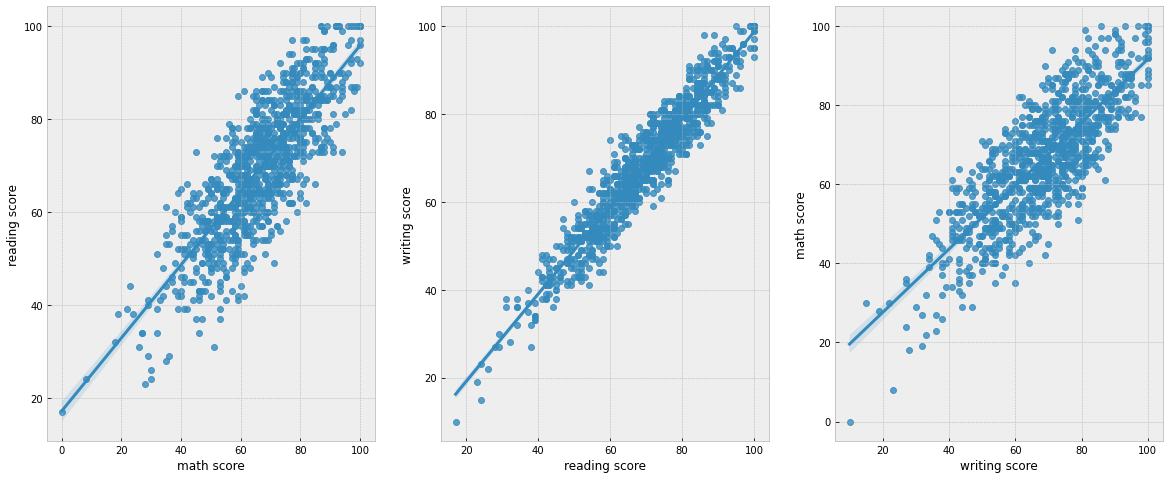

In [35]:
# 각 과목별 상관관계 시각화 한번에 보기
plt.figure(figsize=(20, 8))

## 수학, 읽기
plt.subplot(131)
sns.regplot(x="math score", y="reading score",data=score, )

## 읽기, 쓰기
plt.subplot(132)
sns.regplot(x="reading score", y="writing score",data=score, )

## 쓰기, 수학
plt.subplot(133)
sns.regplot(x="writing score", y="math score",data=score, )

plt.show()

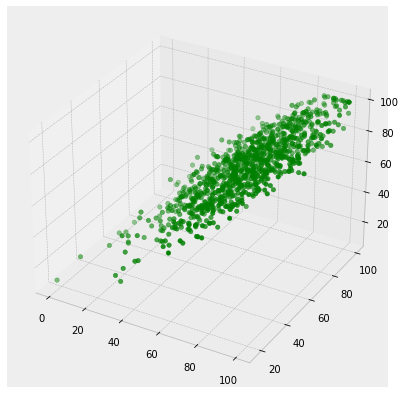

In [36]:
# 각 과목별 상관관계 3D로 시각화 (1)
from mpl_toolkits.mplot3d import Axes3D
xmin, xmax, ymin, ymax, zmin, zmax = 0, 100, 0, 100, 0, 100

x = score['math score'].values
y = score['reading score'].values
z = score['writing score'].values

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color = 'green')
plt.show()

In [37]:
# 각 과목별 상관관계 3D로 시각화 (2)
import plotly.express as px

fig = px.scatter_3d(score, x='math score', y='reading score', z='writing score',opacity=0.3, )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [38]:
# 각 과목별 상관계수
score_only = score[['math score', 'reading score', 'writing score']]
score_only.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


- 각 과목 점수와의 관계를 시각화 한 것과 상관계수를 볼 때 하나의 과목에서 점수를 높게 받은 학생들은 다른 과목에서도 점수를 높게 받았을 확률이 높다는 걸 알 수 있다.

# 회귀분석

지금까지의 결과를 보아하니 각 특성이 성적에 어느 정도는 영향이 있으리라 예측할 수 있다. 이를 알아보기 위해 세 점수 중 상관계수가 서로 높았던 writing, reading score를 제외하고 math score를 타겟으로 삼아 회귀 분석을 진행해 보자.

## 1. 읽기, 쓰기 점수 두 칼럼만 사용하여 예측


In [39]:
# 필요한 라이브러리 import 하기
from sklearn.model_selection import train_test_split
import numpy as np

In [40]:
# 읽기, 쓰기 데이터만 뽑아서 train 데이터로 저장
train = score[['reading score', 'writing score']]
train.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [41]:
# 예측해야할 수학 점수는 y에 저장
y = score['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [42]:
# train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=2022, test_size=0.2)

#sklearn의 LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델에 X_test를 입력해서 예측값 구하기
predictions = model.predict(X_test)

# 모델이 예측한 값과 정답 target 간의 손실함수 mse, rmse 값 구하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse) # rmse는 mse에 제곱.
print(mse)
print(rmse)

70.66569375979802
8.406288941013033


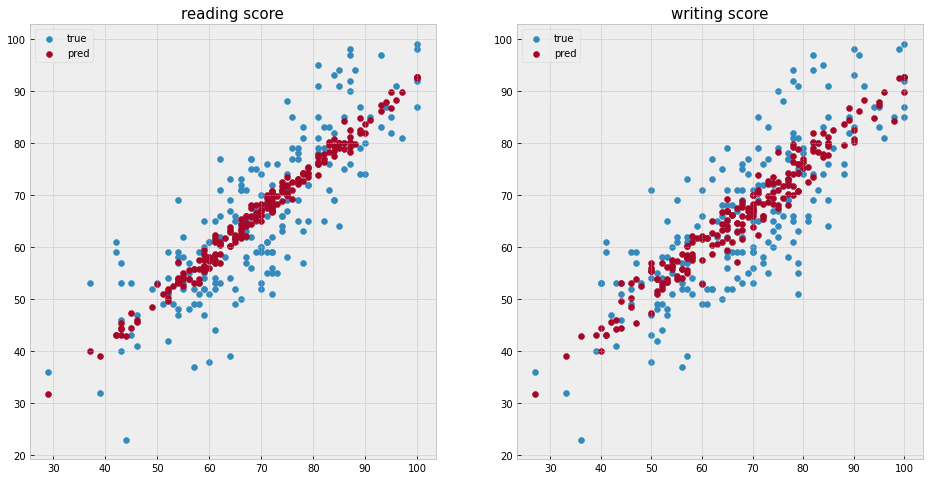

In [43]:
#  x축은 reading score 또는 writing score로, y축은 math score로 예측 결과 시각화하기
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(1,2,1)
plt.title('reading score', fontsize=15)
plt.scatter(X_test['reading score'], y_test, label="true")
plt.scatter(X_test['reading score'], predictions, label="pred")
plt.legend()

ax2 = fig.add_subplot(1,2,2)
plt.title('writing score', fontsize=15)
plt.scatter(X_test['writing score'], y_test, label="true")
plt.scatter(X_test['writing score'], predictions, label="pred")
plt.legend()

plt.show()

- 읽기, 쓰기 점수만으로 수학 점수를 예측 해봤는데 각 점수끼리의 상관계수가 높아서 예측을 잘 하는 듯 하다.
- RMSE 값 = 8.4


### 2. 5개 컬럼만 사용하여 예측

In [44]:
# 모델에 넣기 위해 범주형 데이터를 원-핫 인코딩 진행
df = pd.get_dummies(score['gender'])
df = pd.concat([df, pd.get_dummies(score['race/ethnicity'])], axis='columns')
df = pd.concat([df, pd.get_dummies(score['parental level of education'])], axis='columns')
df = pd.concat([df, pd.get_dummies(score['lunch'])], axis='columns')
df = pd.concat([df, pd.get_dummies(score['test preparation course'])], axis='columns')

y = score['math score']

In [45]:
# 원-핫 인코딩 결과 확인
df.head()

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [46]:
# 5개 컬럼만 사용해서 모델 학습, 예측
# train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=2022, test_size=0.2)

#sklearn의 LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델에 X_test를 입력해서 예측값 구하기
predictions = model.predict(X_test)

# 모델이 예측한 값과 정답 target 간의 손실함수 mse, rmse 값 구하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse) # rmse는 mse에 제곱.
print(mse)
print(rmse)

166.146875
12.889797321913173


- 5개 컬럼만 사용해서 예측을 해보니 각 컬럼별로 수학 성적과 연관이 있긴 했지만 위에서 한 읽기, 쓰기 성적을 사용했을 때만큼은 정확하지 않다.
- 시각화는 하지 않음 
- RMSE 값 13

### 3. 5개 컬럼과 읽기, 쓰기 점수를 사용해서 예측

In [47]:
# 5개 컬럼과 읽기, 쓰기 점수를 사용해서 모델 학습, 예측

## 위의 원-핫 인코딩 결과에 읽기, 쓰기 점수 추가
df = pd.concat([df, score[['writing score', 'reading score']]], axis='columns')
y = score['math score']

# train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=2022, test_size=0.2)

#sklearn의 LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델에 X_test를 입력해서 예측값 구하기
predictions = model.predict(X_test)

# 모델이 예측한 값과 정답 target 간의 손실함수 mse, rmse 값 구하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse) # rmse는 mse에 제곱.
print(mse)
print(rmse)


32.29714152631763
5.683057410084613


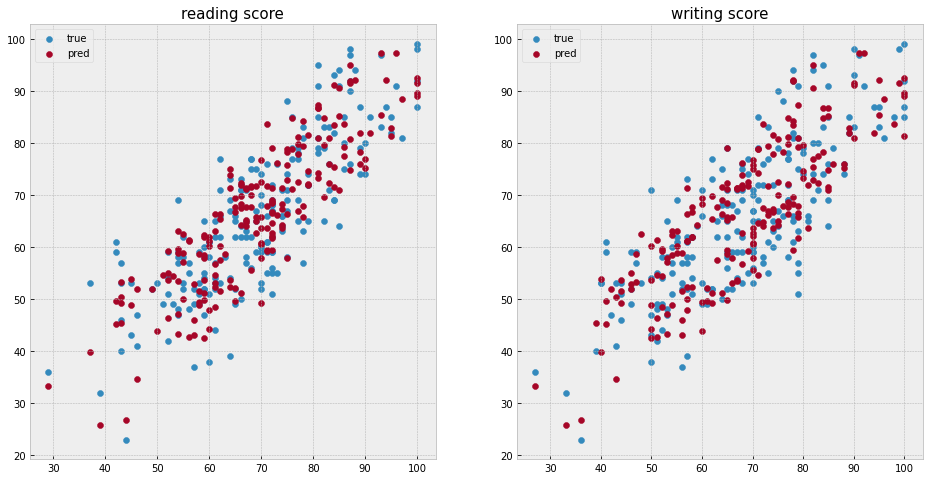

In [48]:
#  x축은 reading score 또는 writing score로, y축은 math score로 예측 결과 시각화하기
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(1,2,1)
plt.title('reading score', fontsize=15)
plt.scatter(X_test['reading score'], y_test, label="true")
plt.scatter(X_test['reading score'], predictions, label="pred")
plt.legend()

ax2 = fig.add_subplot(1,2,2)
plt.title('writing score', fontsize=15)
plt.scatter(X_test['writing score'], y_test, label="true")
plt.scatter(X_test['writing score'], predictions, label="pred")
plt.legend()

plt.show()

- 5개 컬럼과 읽기, 쓰기 점수를 사용해서 예측 해보니 위에서 한 다른 예측보다 더 정확해졌다.
- RMSE = 5.9


- # 결론 
  - 5개 컬럼 모두 3개의 시험 성적에 유의미한 영향을 미친 것을 시각화를 통해 확인하였다.
  - 이를 증명하기 위해 회귀 분석 모델의 train 데이터를 3가지 방식으로 나누어 진행하였다.
  - 그 결과 
    - 1번 모델(읽기, 쓰기 점수)의 RMSE 값은 8.4
    - 2번 모델(5개 컬럼)의 RMSE 값은 13
    - 3번 모델(5개 컬럼 + 읽기, 쓰기 점수)의 RMSE 값은 5.9
  - 2번 모델에선 상관계수가 높은 점수에 대한 데이터가 없으므로 RMSE 값이 높지만 5개 컬럼 뿐만 아니라 점수에 대한 데이터가 있는 3번 모델은 RMSE 값이 매우 낮다.
